In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
class SVM:
    def __init__(self, lr=0.01, iters=1000, C=0.01):
        self.lr = lr
        self.iters = iters
        self.C = C # Regularization constant
        self.w = None
        self.w_0 = None

    def fit(self, X, y):
        _, features_size = X.shape

        # feature extraction into two classes
        y = np.where(y <= 0, -1, 1)

        # initialize weights and biases to random numbers
        self.w = np.random.random(features_size)
        self.w_0 = np.random.random()

        for _ in range(self.iters):
            for idx, x_i in enumerate(X):
                # correctly classified and beyond hyperplane boundary (buffer area)
                is_correctly_classified = y[idx] * (np.dot(x_i, self.w) - self.w_0) >= 1
                if (is_correctly_classified):
                    # update weights by applying gradient descent method
                    self.w -= self.lr * (2 * self.C * self.w)
                else: 
                    # update weights and biases using grad desc method with regularization
                    self.w -= self.lr * (2 * self.C * self.w - np.dot(x_i, y[idx]))
                    
                    # update bias by lr * misclassified class
                    self.w_0 -= self.lr * y[idx]

    def predict(self, X):
        # predict the approx value using the trained weights and return the corresponding class
        return np.sign(np.dot(X, self.w) - self.w_0)

In [3]:
# Data Preparation
X, y = datasets.make_blobs(
    n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=42
)
y = np.where(y == 0, -1, 1)

In [4]:
# classifier
clf = SVM()

# fit data and make predictions
clf.fit(X, y)
y_pred = clf.predict(X)

print("SVM accuracy:", (np.sum(y == y_pred) / len(y)))
print(clf.w, clf.w_0)

SVM accuracy: 1.0
[ 0.33662333 -0.19082341] -0.6493126051962453


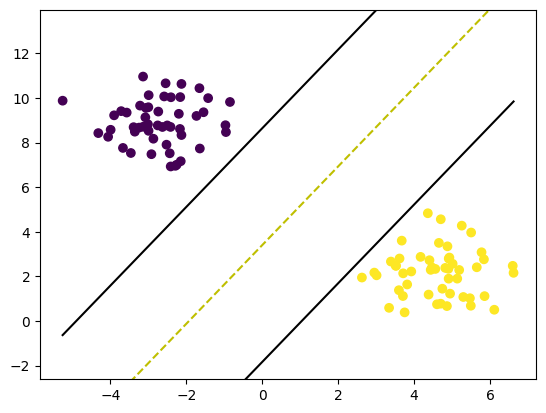

In [5]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, clf.w, clf.w_0, 0)
x1_2 = get_hyperplane_value(x0_2, clf.w, clf.w_0, 0)

x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.w_0, -1)
x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.w_0, -1)

x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.w_0, 1)
x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.w_0, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()